In [3]:
library(tidyverse)
library(factoextra)
library(scales)
library(ggpol)
library(gridExtra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine




In [4]:
atacseq_data <- read.table('ATACseq_rep0+rep1+rep2+rep3_normalizedbyDESeq_BICandLRfromreplicates.txt', header=T)


In [5]:
dim(atacseq_data)


[1] 74761    29

In [6]:
head(atacseq_data)


,seqnames,start,end,T0,T20,T60,T2H,T4H,T24H,T01,⋯,T4H2,T24H2,T03,T203,T603,T2H3,T4H3,T24H3,LR,BIC_difference
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr10,100006331,100006563,12.687560,9.914589,24.708859,18.48857,68.979604,44.215987,11.693635,⋯,79.384048,38.453990,9.098770,7.008198,27.030314,30.211588,89.105625,45.518495,-5.810416107,-4.0186566
2,chr10,100009362,100010421,196.000919,194.686480,215.693805,188.88320,222.988523,180.228210,220.230131,⋯,255.708232,159.584057,207.451966,238.278735,269.659563,184.016039,252.273067,158.699619,0.005515515,1.7972750
3,chr10,100118128,100118310,4.812523,17.125200,5.232464,14.49104,6.146697,9.131563,5.846818,⋯,1.526616,7.690798,5.459262,17.019910,5.792210,9.612778,6.943295,9.841837,-4.493543938,-2.7017845
4,chr10,100148537,100149145,31.937650,25.687799,33.720325,52.96725,130.788061,115.826663,38.978784,⋯,168.691102,124.975466,16.377787,18.021081,31.535367,53.556907,109.935511,102.109057,-13.403737332,-11.6119779
5,chr10,100164173,100164282,5.250025,3.605305,9.592851,11.99258,5.463731,13.457040,5.846818,⋯,1.526616,5.768098,4.549385,4.004685,7.079368,5.493016,6.943295,13.532526,-0.345396111,1.4463634
6,chr10,100167603,100168094,28.000131,18.477189,22.092627,35.97775,30.392004,22.588602,25.336210,⋯,33.585559,24.995093,34.575328,19.022252,15.445894,41.197621,30.087614,18.453444,-0.874021862,0.9177376


In [7]:
idx0 <- c('T0','T20','T60','T2H','T4H','T24H')
idx1 <- paste(idx0, '1', sep='')
idx2 <- paste(idx0, '2', sep='')
idx3 <- paste(idx0, '3', sep='')

time0 <- c('0 min','20 mins','1 hrs', '2 hrs',' 4 hrs', '24 hrs')


### plot the peaks and FRAP scrore for ATAC-seq data

In [8]:
y=c(30403, 27793, 47823, 22664, 43537, 30593, 0.071, 0.066, 0.115, 0.057, 0.103, 0.061)
atacseq_peaknumber <- data.frame(x=factor(c(time0, time0), levels=time0), y=y, label=rep(c('Peak','FRIP'), each=6), 
                                 label2=c(y[1:6], percent(y[7:12])))


In [9]:
T0_intersect <- c(30403,20526, 23596, 17098,22892, 17759)
T20_intersect <- c(20526, 27793, 24442, 17376, 23631, 18094)
T60_intersect <- c(23596, 24442, 47823, 19354, 35261, 22788)
T2H_intersect <- c(17098, 17376, 19354, 22664, 19157, 16350)
T4H_intersect <- c(22892, 23631, 35261, 19157, 43537, 23335)
T24H_intersect <- c(17759, 18094, 22788, 16350, 23335, 30593)



In [10]:
atacseq_intersect <- rbind(T0_intersect, T20_intersect, T60_intersect, T2H_intersect, T4H_intersect, T24H_intersect)

In [11]:
atacseq_intersect[lower.tri(atacseq_intersect)] <- NA
atacseq_intersect

T0_intersect,30403,20526,23596,17098,22892,17759
T20_intersect,NA,27793,24442,17376,23631,18094
T60_intersect,NA,NA,47823,19354,35261,22788
T2H_intersect,NA,NA,NA,22664,19157,16350
T4H_intersect,NA,NA,NA,NA,43537,23335
T24H_intersect,NA,NA,NA,NA,NA,30593


In [12]:
colnames(atacseq_intersect) <- c('0 min', '20 mins', '1 hrs','2 hrs','4 hrs','24 hrs')
rownames(atacseq_intersect) <- c('0 min', '20 mins', '1 hrs','2 hrs','4 hrs','24 hrs')

In [13]:
data_intersect <- expand.grid(rownames(atacseq_intersect), colnames(atacseq_intersect))
data_intersect$value <- as.vector(atacseq_intersect)

Warning message:
“Removed 15 rows containing missing values (geom_text).”


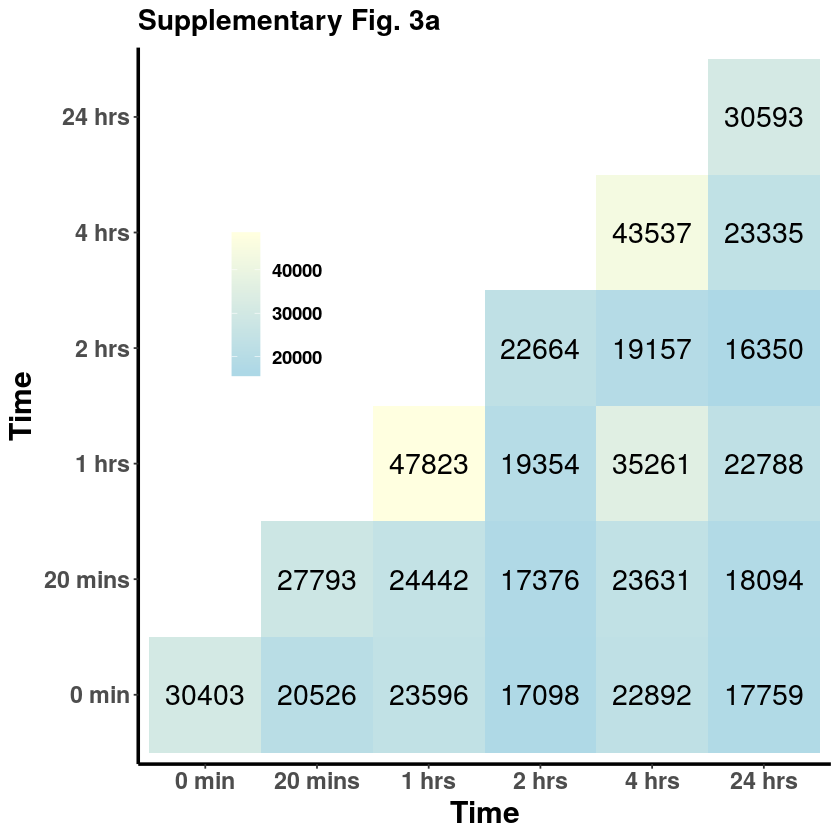

In [40]:
ggplot(data=data_intersect, aes(x=Var1, y=Var2, fill=value)) + geom_tile() + 
geom_text(aes(label=value), color='black',size=6) +
xlab('Time') + ylab('Time') +
scale_fill_gradient(high='lightyellow',low='lightblue', na.value='white') + 
theme(panel.background=element_blank(),#panel.background=element_rect(fill='white',color='black',linetype=1),  panel.grid.major=element_line(color='grey', size=0.1), 
axis.line=element_line(size=1), strip.text=element_blank(),
text=element_text(size=14, face="bold"), legend.title=element_blank(),
axis.text=element_text(size=14, face='bold'), axis.title=element_text(size=18, face="bold"),
legend.position=c(.2,.65)) + ggtitle('Supplementary Fig. 3a') +
coord_flip()


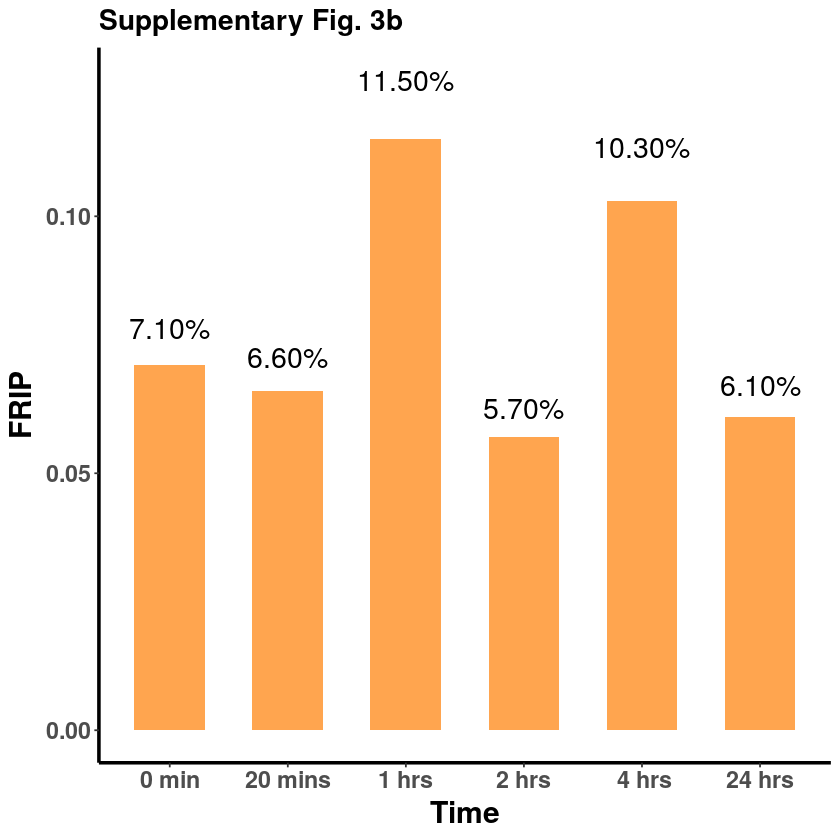

In [39]:
#p_peak <- ggplot(data=subset(atacseq_peaknumber, atacseq_peaknumber$label %in% 'Peak')) + 
#geom_col(aes(x=x,y=y), fill="cornflowerblue", width=0.8) + xlab('Time') + 
#ylab('Number of Peaks') + 
#geom_text(aes(x=x, y=1.1*y, label = label2), color='black', size=8 )  + 
#theme(panel.background=element_blank(),#panel.background=element_rect(fill='white',color='black',linetype=1),  panel.grid.major=element_line(color='grey', size=0.1), 
#axis.line=element_line(size=1), strip.text=element_blank(),
#text=element_text(size=14, face="bold"),
#axis.text=element_text(size=14, face='bold'), axis.title=element_text(size=18, face="bold")) + 
#                     facet_wrap(.~label, ncol=1, scales='free_y')
ggplot(data=subset(atacseq_peaknumber, atacseq_peaknumber$label %in% 'FRIP')) + 
geom_col(aes(x=x,y=y), fill='tan1', width=0.6) + xlab('Time') + 
ylab('FRIP') + geom_text(aes(x=x, y=1.1*y, label = label2), color='black', size=6 )  + 
theme(panel.background=element_blank(),#panel.background=element_rect(fill='white',color='black',linetype=1),  panel.grid.major=element_line(color='grey', size=0.1), 
axis.line=element_line(size=1), strip.text=element_blank(),
text=element_text(size=14, face="bold"),
axis.text=element_text(size=14, face='bold'), axis.title=element_text(size=18, face="bold")) +  ggtitle('Supplementary Fig. 3b') +
                     facet_wrap(.~label, ncol=1, scales='free_y')

#ggsave('../../../IntegratingATAC-RNA-HiC/Individual_Figures_Files/ATACSeq_peak_anno_peaksizehistogram//ATACSeq_peaknumber.pdf', p_peak)
#ggsave('../../../IntegratingATAC-RNA-HiC/Individual_Figures_Files/ATACSeq_peak_anno_peaksizehistogram//ATACSeq_FRIP.pdf', p_FRIP)

       #p_peak_FRIP, width=3, height=3, units='in', dpi=300) 

In [16]:
atacseq_dataonly <- atacseq_data[,c(idx1,idx2,idx3)]


In [17]:
#pca_atacseq_dynamic <- prcomp(t(atacseq_dynamic), scale=TRUE, center=TRUE)
pca_atacseq <- prcomp(t(atacseq_dataonly), scale=TRUE, center=TRUE)


In [18]:
summary(pca_atacseq)

Importance of components:
                            PC1     PC2      PC3      PC4      PC5      PC6
Standard deviation     148.0711 92.3205 66.97149 64.02360 61.86058 59.85077
Proportion of Variance   0.2933  0.1140  0.05999  0.05483  0.05119  0.04791
Cumulative Proportion    0.2933  0.4073  0.46727  0.52210  0.57328  0.62120
                            PC7      PC8      PC9    PC10     PC11     PC12
Standard deviation     59.26554 58.01569 55.87650 54.4784 53.00629 50.99272
Proportion of Variance  0.04698  0.04502  0.04176  0.0397  0.03758  0.03478
Cumulative Proportion   0.66818  0.71320  0.75496  0.7947  0.83224  0.86702
                           PC13     PC14     PC15     PC16     PC17      PC18
Standard deviation     49.55097 47.48416 43.59011 41.69653 39.91038 5.965e-13
Proportion of Variance  0.03284  0.03016  0.02542  0.02326  0.02131 0.000e+00
Cumulative Proportion   0.89986  0.93002  0.95544  0.97869  1.00000 1.000e+00

In [20]:
pca_atacseq_forplot <- data.frame(PC1=pca_atacseq$x['PC1'], PC2=pca_atacseq$x['PC2'], 
                                  replicate = c(rep(1,6), rep(2,6), rep(3,6)), time = c(idx0, idx0, idx0))


In [21]:
pca_atacseq_vars <- apply(pca_atacseq$x, 2, var)  
pca_atacseq_props <- pca_atacseq_vars / sum(pca_atacseq_vars)
pca_atacseq_label_PC1 <- round(pca_atacseq_props[1], digits=2)
pca_atacseq_label_PC2 <- round(pca_atacseq_props[2], digits=2)

#pca_atacseq_dynamic_vars <- apply(pca_atacseq_dynamic$x, 2, var)  
#pca_atacseq_dynamic_props <- pca_atacseq_dynamic_vars / sum(pca_atacseq_dynamic_vars)
#pca_atacseq_dynamic_label_PC1 <- round(pca_atacseq_dynamic_props[1], digits=2)
#pca_atacseq_dynamic_label_PC2 <- round(pca_atacseq_dynamic_props[2], digits=2)





In [22]:
pca_atacseq_forplot <- data.frame(PC1=pca_atacseq$x[,'PC1'], PC2=pca_atacseq$x[,'PC2'], 
                                  label_PC1=paste('PC1', percent(pca_atacseq_label_PC1)), 
                                  label_PC2=paste('PC2', percent(pca_atacseq_label_PC2)), 
                                  Replicate = factor(c(rep(1,6), rep(2,6), rep(3,6))), 
                                  Time = factor(c(time0, time0, time0), levels=time0))


In [23]:
pca_atacseq_forplot$label <- 'All'
pca_atacseq_forplot$label2 <- 'ATAC-seq'



In [24]:
rownames(pca_atacseq_forplot) <- NULL


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



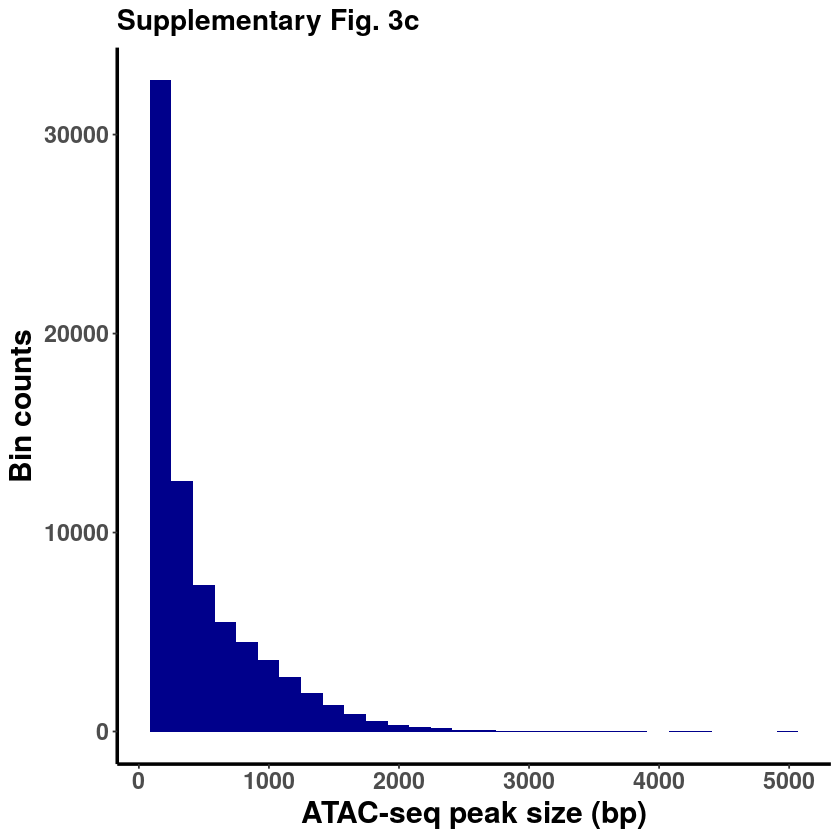

In [38]:
ggplot(data=atacseq_data, aes(x=atacseq_data$end-atacseq_data$start+1)) + 
geom_histogram(fill='darkblue') + 
xlab('ATAC-seq peak size (bp)') + 
ylab('Bin counts') + ggtitle('Supplementary Fig. 3c') +
theme(panel.background=element_blank(),#panel.background=element_rect(fill='white',color='black',linetype=1),  panel.grid.major=element_line(color='grey', size=0.1), 
axis.line=element_line(size=1),
text=element_text(size=14, face="bold"),
axis.text=element_text(size=14, face='bold'), axis.title=element_text(size=18, face="bold"))

#ggsave('../../../IntegratingATAC-RNA-HiC/Individual_Figures_Files/ATACSeq_peak_anno_peaksizehistogram//ATACSeq_peak_histogram1.pdf')

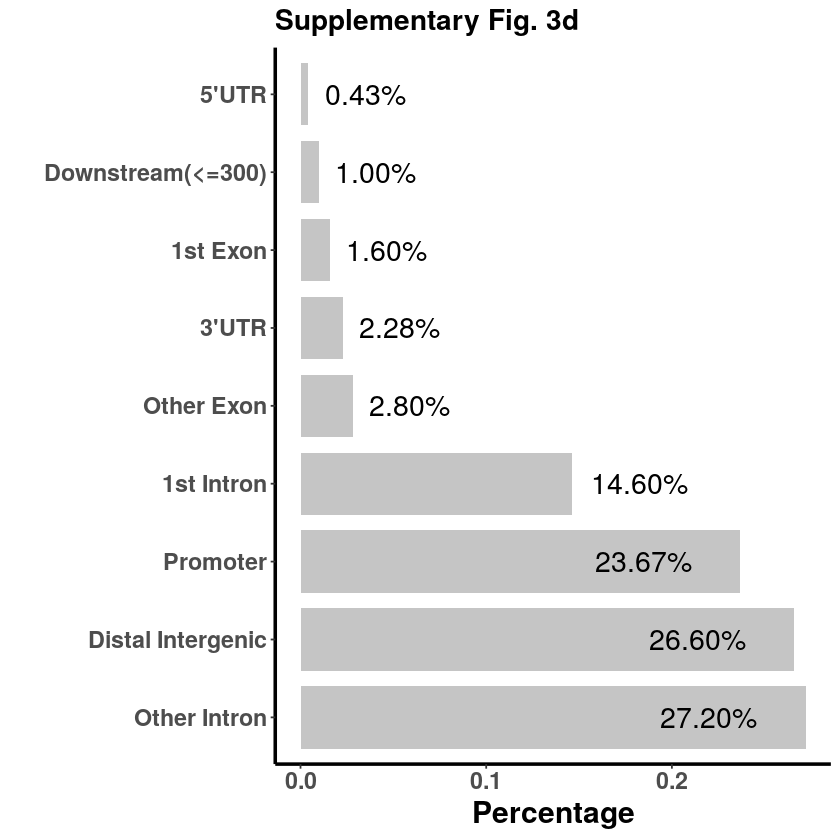

In [37]:
percentage_for_plot <- data.frame(Region=c("Promoter","5'UTR","3'UTR","1st Exon","Other Exon","1st Intron",
                                           "Other Intron", "Downstream(<=300)","Distal Intergenic"),
                                  Percentage=c(0.2367, 0.00428, 0.0228, 0.016, 0.028, 0.146, 0.272, 0.010, 0.266))
ggplot(data=percentage_for_plot, aes(reorder(Region,-Percentage),y=Percentage)) + geom_col(color=NA,fill='grey',alpha=0.9, width=0.8) + coord_flip() + 
geom_text(aes( label = percent(Percentage), hjust=ifelse(Percentage*6>1,1.5,-0.2)), color='black', size=6 ) + xlab('') +
#theme(plot.margin=unit(c(t=0,l=5.2,b=0,r=-5.2),"cm"), panel.background=eleme_blank(), axis.line=element_line(siz,size=15e=1),
theme(panel.background=element_blank(),#panel.background=element_rect(fill='white',color='black',linetype=1),  panel.grid.major=element_line(color='grey', size=0.1), 
     axis.line=element_line(size=1),
     text=element_text(size=14, face="bold"),
     axis.text=element_text(size=14, face='bold'), 
     axis.title=element_text(size=18, face="bold")) + ggtitle('Supplementary Fig. 3d')
#ggsave("../../../IntegratingATAC-RNA-HiC/Individual_Figures_Files/ATACSeq_peak_anno_peaksizehistogram/ATACSeq_peak_anno_piechart.pdf", p2)

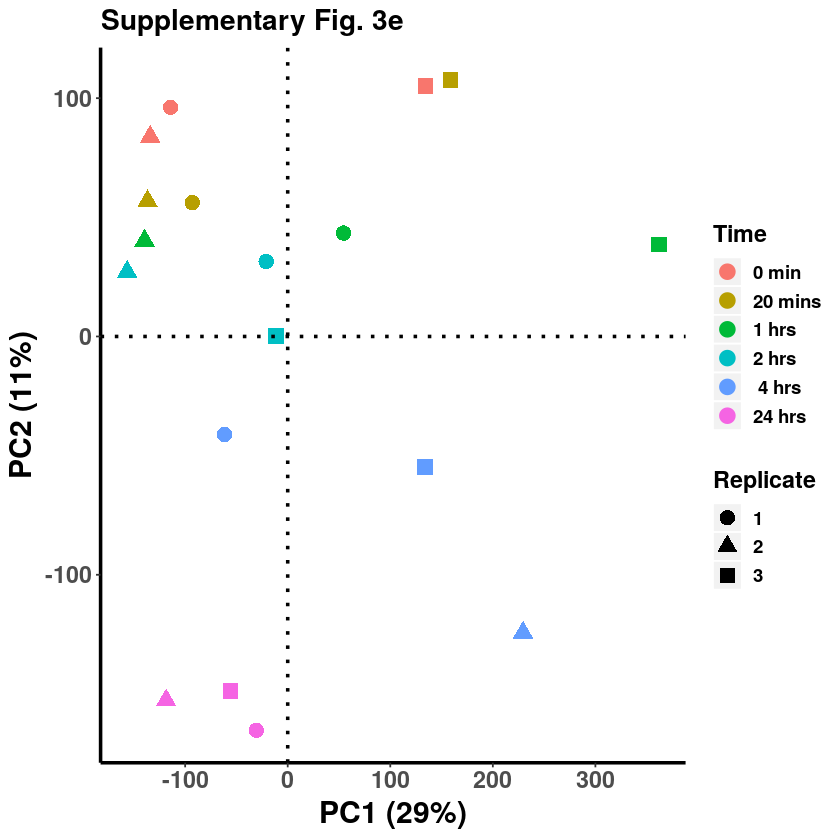

In [36]:
ggplot(data=pca_atacseq_forplot, aes(x=PC1, y=PC2, col=Time)) + geom_point(aes(shape=Replicate), size=4) + 
geom_hline(yintercept=0, linetype='dotted',size=1) + geom_vline(xintercept=0,linetype='dotted',size=1)+
#geom_segment(aes(x=-200,xend=max(PC1), y=-200, yend=-200), linetype='solid', color='black') + 
#geom_segment(aes(x=-200,xend=-200, y=-200, yend=max(PC2)),linetype='solid', color='black')+

#geom_text(aes(x=0, y=min(PC2)-100, label=label_PC1), color='black') +
#geom_text(aes(x=min(PC1)-100, y=0, label=label_PC2), color='black', angle=90) +

    xlab(paste('PC1 ', '(',percent(pca_atacseq_label_PC1),')', sep='')) + 
    ylab(paste('PC2 ', '(',percent(pca_atacseq_label_PC2),')', sep='')) +
    labs(c('Time','replicate')) + 
theme(panel.background=element_blank(),#panel.background=element_rect(fill='white',color='black',linetype=1),  panel.grid.major=element_line(color='grey', size=0.1), 
     axis.line=element_line(size=1),
       text=element_text(size=14, face="bold"),
                 axis.text=element_text(size=14, face='bold'), axis.title=element_text(size=18, face="bold"),
      strip.text.x=element_blank(),strip.text.y=element_blank(), strip.background=element_blank()) + 
 ggtitle('Supplementary Fig. 3e') + facet_grid(label2 ~ label)

#ggsave('../../../IntegratingATAC-RNA-HiC/Individual_Figures_Files/ATACSeq_peak_anno_peaksizehistogram//ATACSeq-PCA.pdf')

In [29]:
df.vdc <- data.frame(x = c(0, 1.2, 0.8, -1.2, -0.8, 0, 0),
         y = c(1.2, -0.6, 0.5, -0.6, 0.5, -1, 0),
         labels = c('A','B','C','D','E','F','G'))
df.venn <- data.frame(x = c(0, 0.466),
                      y = c(1, 1),
                      labels = c('A', 'B'))

In [30]:
data_venn <- data.frame(intersect=c(21549,22911,39021), uniq_in_our=c(8854,7682,35740),uniq_in_13=c(14926,29182,24279))

In [31]:
df.venn0 <- data.frame(x = c(0, data_venn$uniq_in_our[1]/(data_venn$intersect[1]+data_venn$uniq_in_our[1])),
                      y = c(1, 1),
                      label1 = c('0 min in our data', '0 min in Gate et al'),
                      label2 = c('Our data','Data from Gate et al'))
df.venn1 <- data.frame(x = c(0, data_venn$uniq_in_our[2]/(data_venn$intersect[2]+data_venn$uniq_in_our[2])),
                      y = c(2.2, 2.2),
                      label1 = c('24 hrs in our data', '48 hrs in Gate et al'),
                      label2 = c('Our data','Data from Gate et al'))

df.venn2 <- data.frame(x = c(0, data_venn$uniq_in_our[3]/(data_venn$intersect[3]+data_venn$uniq_in_our[3])),
                      y = c(3.4, 3.4),
                      label1 = c('Our merged data', 'Merged data in Gate et al'),
                      label2 = c('Our data','Data from Gate et al'))

df.venn <- rbind(df.venn0, df.venn1, df.venn2) 
df.venn$label1 <- factor(df.venn$label1, levels=c(as.character(df.venn0$label1), 
                                                  as.character(df.venn1$label1), 
                                                  as.character(df.venn2$label1)))

In [32]:
df.label <- data.frame(x=c(-0.15, 0.4, 0.85, -0.2, 0.3,0.82, 0.0, 0.4, 0.9)-0.2, 
                       y=c(0.0, 0.0, 0.0, 1.2, 1.2, 1.2, 2.4, 2.4, 2.4)+1.0,
                       Counts=c(8854,21549,14926, 7682, 22911, 29182, 35740, 39021, 24279))

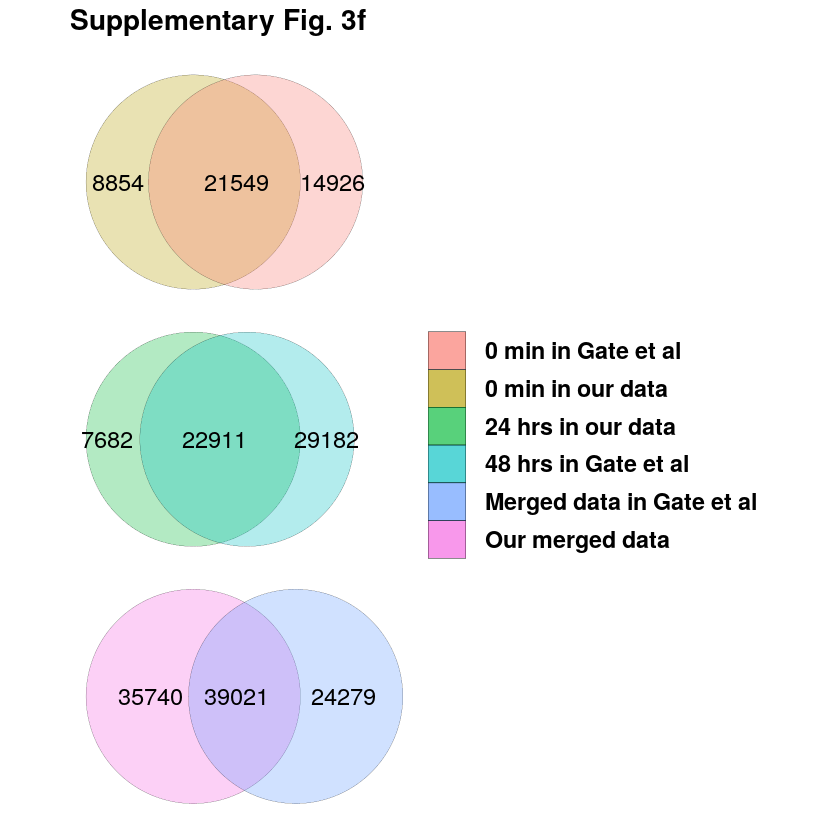

In [35]:
ggplot() +
  geom_circle(data=df.venn[1:2,], aes(x = x, y = -y, r = 0.5, fill = label1), alpha = .3, size = 0.05) +
  geom_circle(data=df.venn[3:4,], aes(x = x, y = -y, r = 0.5, fill = label1), alpha = .3, size = 0.05) +
  geom_circle(data=df.venn[5:6,], aes(x = x, y = -y, r = 0.5, fill = label1), alpha = .3, size = 0.05) +
  
  coord_fixed() +
  theme_void() +
  theme(legend.position = 'right', legend.text = element_text(size=14, face='bold'),text=element_text(size=14, face="bold"),
      legend.key.size = unit(0.8, "cm"), legend.spacing.x = unit(0.4, 'cm')) +scale_color_brewer(palette="BuGn")+   
  annotate("text", x = df.label$x, y = -df.label$y, label = df.label$Counts, size = 5) +
  labs(fill=NULL)  +  ggtitle('Supplementary Fig. 3f') 
  #annotate("text", x = df.vdc$x, y = df.vdc$y, label = df.vdc)
#ggsave('../../../IntegratingATAC-RNA-HiC/Individual_Figures_Files/ATACSeq_peak_anno_peaksizehistogram//ATACSeq-peak-overlap.pdf')